In [ ]:
from joblib import load

X_train = load('X_train.joblib')
y_train = load('y_train.joblib')
X_valid = load('X_valid.joblib')
y_valid = load('y_valid.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = nn.Sequential(
    nn.Linear(in_features=300, out_features=512, dtype=torch.float64),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=512, dtype=torch.float64),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=4, dtype=torch.float64)
)
model = model.to(device)
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))

epochs = 50
lr = 0.1
momentum = 0.5
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
batch_size = 64

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
X_train = torch.from_numpy(X_train).to(device)
y_train = torch.from_numpy(np.array(y_train)).to(device)
X_valid = torch.from_numpy(X_valid).to(device)
y_valid = torch.from_numpy(np.array(y_valid)).to(device)

for epoch in range(epochs):
  train_loss = 0.0
  train_acc = 0
  val_loss = 0.0
  model.train()
  for X_train_, y_train_ in train_loader:
    X_train_ = X_train_.to(device)
    y_train_ = y_train_.to(device)
    optimizer.zero_grad()
    y_pred = model(X_train_)
    loss = criterion(y_pred, y_train_)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    val_loss += criterion(model(X_valid), y_valid).item()
  train_loss_list.append(train_loss)
  train_acc_list.append(sum(torch.max(model(X_train), 1)[1] == y_train).item() / len(y_train))
  val_loss_list.append(val_loss)
  val_acc_list.append(sum(torch.max(model(X_valid), 1)[1] == y_valid).item() / len(y_valid))

cuda


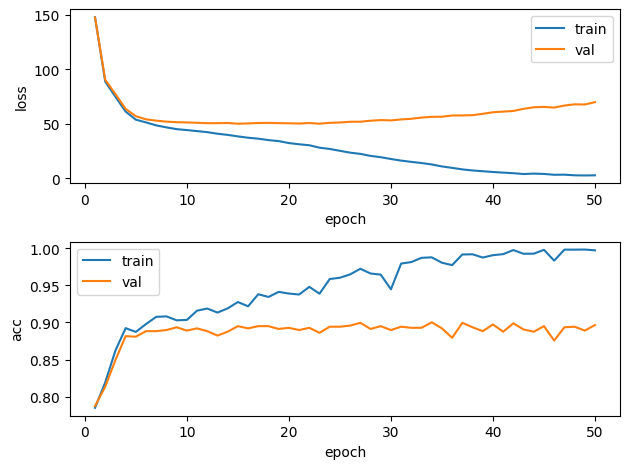

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot([i+1 for i in range(epochs)], train_loss_list, label='train')
ax1.plot([i+1 for i in range(epochs)], val_loss_list, label='val')
ax2.plot([i+1 for i in range(epochs)], train_acc_list, label='train')
ax2.plot([i+1 for i in range(epochs)], val_acc_list, label='val')
ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2.set_ylabel('acc')
ax1.legend()
ax2.legend()
plt.tight_layout()

In [ ]:
print('train acc:', train_acc_list[-1])
print('valid acc:', val_acc_list[-1])
X_test = torch.from_numpy(X_test).to(device)
y_test = torch.from_numpy(np.array(y_test)).to(device)
y_pred_test = model(X_test)
print('test acc:', sum(torch.max(y_pred_test, 1)[1] == y_test).item() / len(y_test))

train acc: 0.9974700149925038
valid acc: 0.896551724137931
test acc: 0.8988005997001499
